In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# classifier options
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# libraries for evaluating model performance
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/File_DS/customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Merapikan kolom Total Charges

In [ ]:
# Konversi nilai di kolom TotalCharges menjadi tipe numerik
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce') # jika upaya konversi string ke angka gagal, akan dijadikan null saja
df['TotalCharges'] = df['TotalCharges'].astype('float')
df['TotalCharges']

,TotalCharges
0,29.85
1,1889.50
2,108.15
3,1840.75
4,151.65
...,...
7038,1990.50
7039,7362.90
7040,346.45
7041,306.60


In [ ]:
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
df[(df['TotalCharges'].isnull()==False) & (df['tenure']==0)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [ ]:
# Imputasi mengisi nilai null di kolom TotalCharges dengan nilai 0
df['TotalCharges'] = df['TotalCharges'].fillna(0)
df['TotalCharges'].isnull().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Distribusi target variable (Churn)

In [ ]:
df['Churn'].value_counts()
# In this case we have class imbalance with few positives. In our business challenge, False negatives are costly.
# Hence let’s keep an eye onto the Precision, Recall & F2 score beside accuracy, as well as ROC-AUC.


,count
Churn,
No,5174
Yes,1869


## Label encoding untuk kolom2 binary (pilihan nilainya cuma ada maks 2)

In [ ]:
df_tmp = df.copy()

In [ ]:
df_tmp.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
#Label Encode Binary data

encoders = {} # menyimpan objek encoder untuk kolom-kolom yg di-encode

# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in df_tmp.columns[1:]:
    if df_tmp[col].dtype == 'object':
        if len(list(df_tmp[col].unique())) <= 2:
            print(col)
            le = LabelEncoder()
            le.fit(df_tmp[col])
            df_tmp[col] = le.transform(df_tmp[col])
            encoders[col] = le
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

gender
Partner
Dependents
PhoneService
PaperlessBilling
Churn
6 columns were label encoded.


In [ ]:
df_tmp

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0
7039,2234-XADUH,0,0,1,1,72,1,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,0,0,1,1,11,0,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1


Exploratory Data Analysis (EDA)


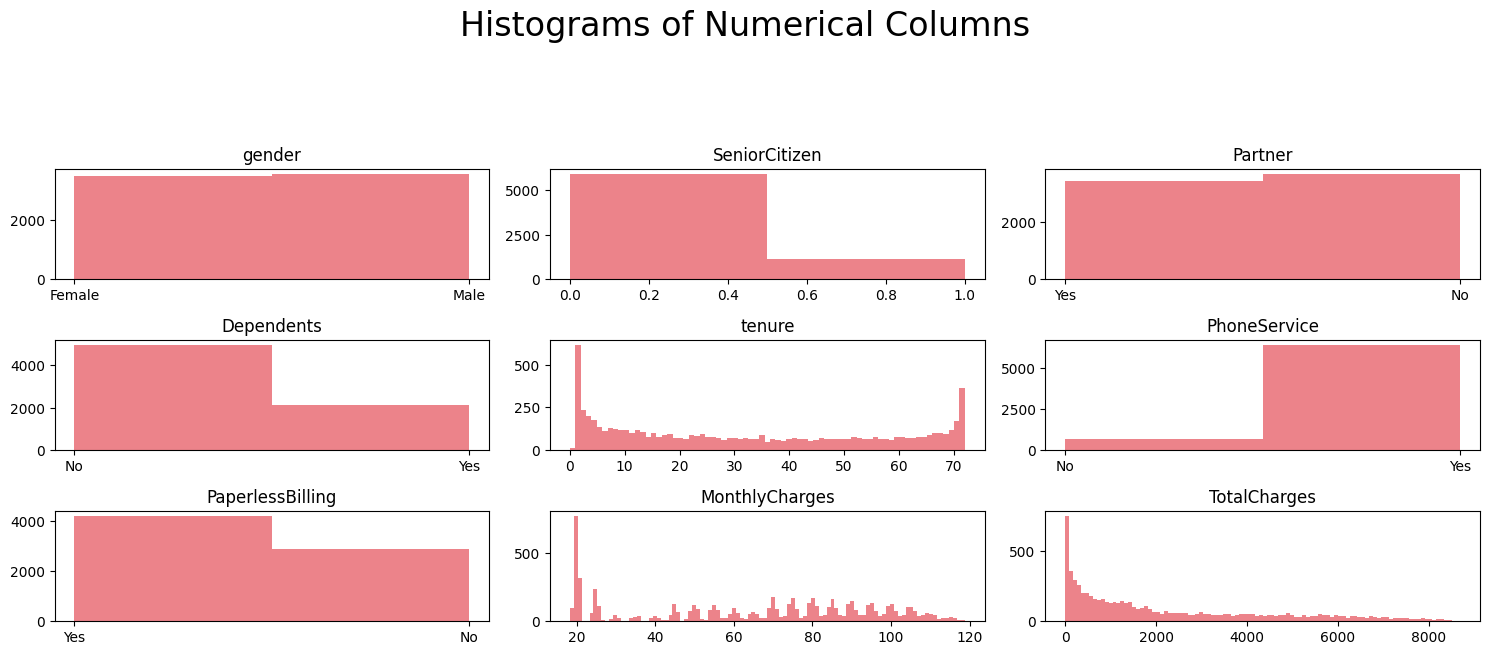

In [ ]:
# Plot Histogram of numeric Columns

dataset2 = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling',
        'MonthlyCharges', 'TotalCharges']]

fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns\n',horizontalalignment="center",fontstyle = "normal", fontsize = 24, fontfamily = "sans-serif")
for i in range(dataset2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])

    vals = np.size(dataset2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100

    plt.hist(dataset2.iloc[:, i], bins=vals, color = '#ec838a')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

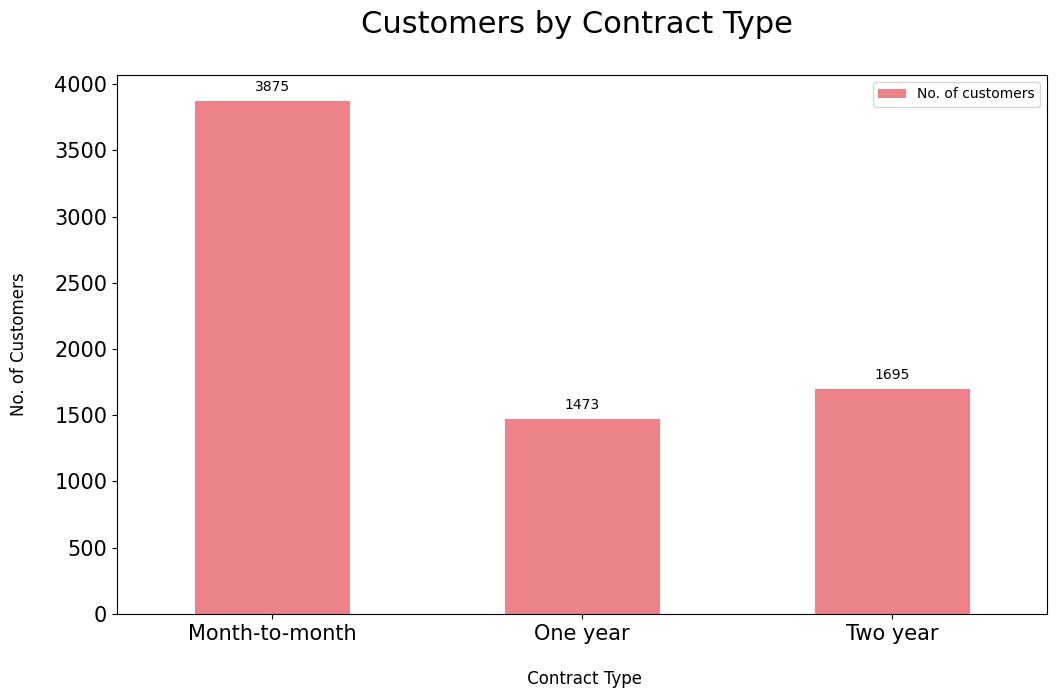

In [ ]:
# Analyze distribution of Key Categorical Variables

#(1) Distribution of Contract Type

contract_split = df[[ "customerID", "Contract"]]
sectors = contract_split .groupby ("Contract")
contract_split = pd.DataFrame(sectors["customerID"].count())
contract_split.rename(columns={'customerID':'No. of customers'}, inplace=True)


ax =  contract_split[["No. of customers"]].plot.bar(title = 'Customers by Contract Type', legend =True, table = False, grid = False,  subplots = False,  figsize =(12, 7), color ='#ec838a', fontsize = 15, stacked=False)

plt.ylabel('No. of Customers\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Contract Type',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Customers by Contract Type \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

x_labels = np.array(contract_split[["No. of customers"]])

def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.0f}".format(y_value)
        ax.annotate(
            label,
            (x_value, y_value),
            xytext=(0, space),
            textcoords="offset points",
            ha='center',
            va=va)
add_value_labels(ax)

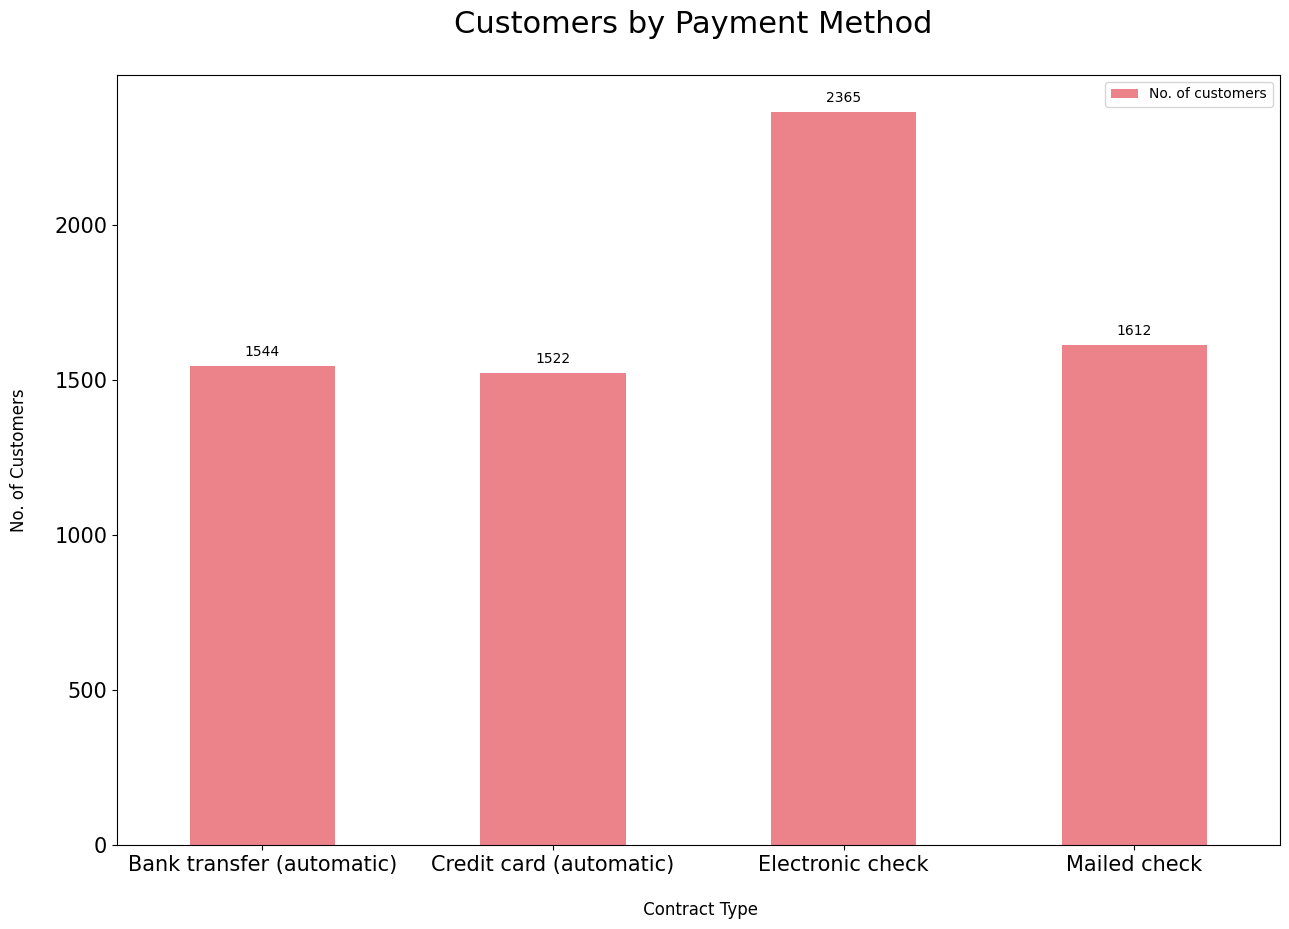

In [ ]:
#(2) Distribution of Payment Method Type

payment_method_split = df[[ "customerID", "PaymentMethod"]]
sectors = payment_method_split.groupby ("PaymentMethod")
payment_method_split  = pd.DataFrame(sectors["customerID"].count())
payment_method_split.rename(columns={'customerID':'No. of customers'}, inplace=True)


ax =  payment_method_split [["No. of customers"]].plot.bar(title = 'Customers by Payment Method', legend =True, table = False, grid = False,  subplots = False,  figsize =(15, 10), color ='#ec838a', fontsize = 15, stacked=False)

plt.ylabel('No. of Customers\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Contract Type',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Customers by Payment Method \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

x_labels = np.array(payment_method_split [["No. of customers"]])

def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.0f}".format(y_value)
        ax.annotate(
            label,
            (x_value, y_value),
            xytext=(0, space),
            textcoords="offset points",
            ha='center',
            va=va)
add_value_labels(ax)

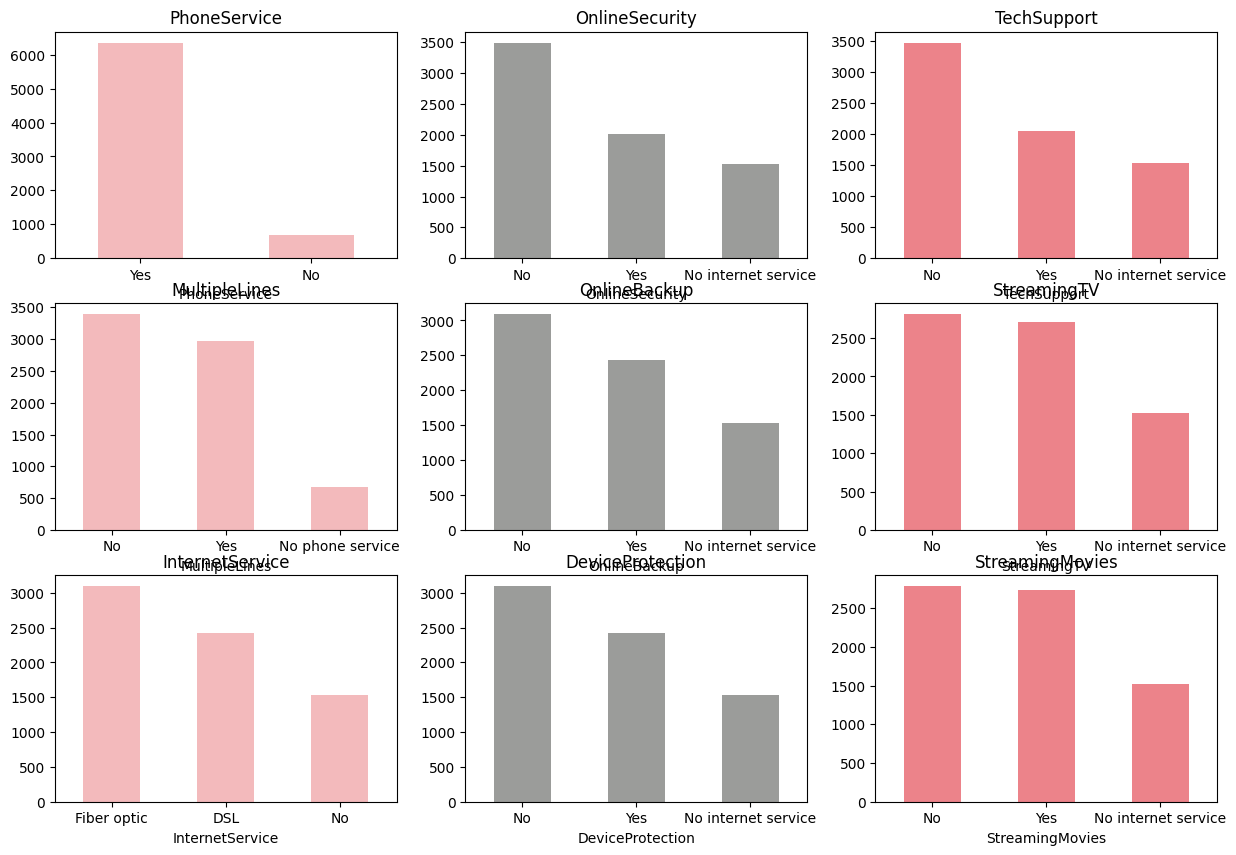

In [ ]:
#(3) Distribution of various Label Encoded Categorical Variables

services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,10))
for i, item in enumerate(services):
    if i < 3:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0, color ='#f3babc' )

    elif i >=3 and i < 6:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0,color ='#9b9c9a')

    elif i < 9:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0,color = '#ec838a')
    ax.set_title(item)

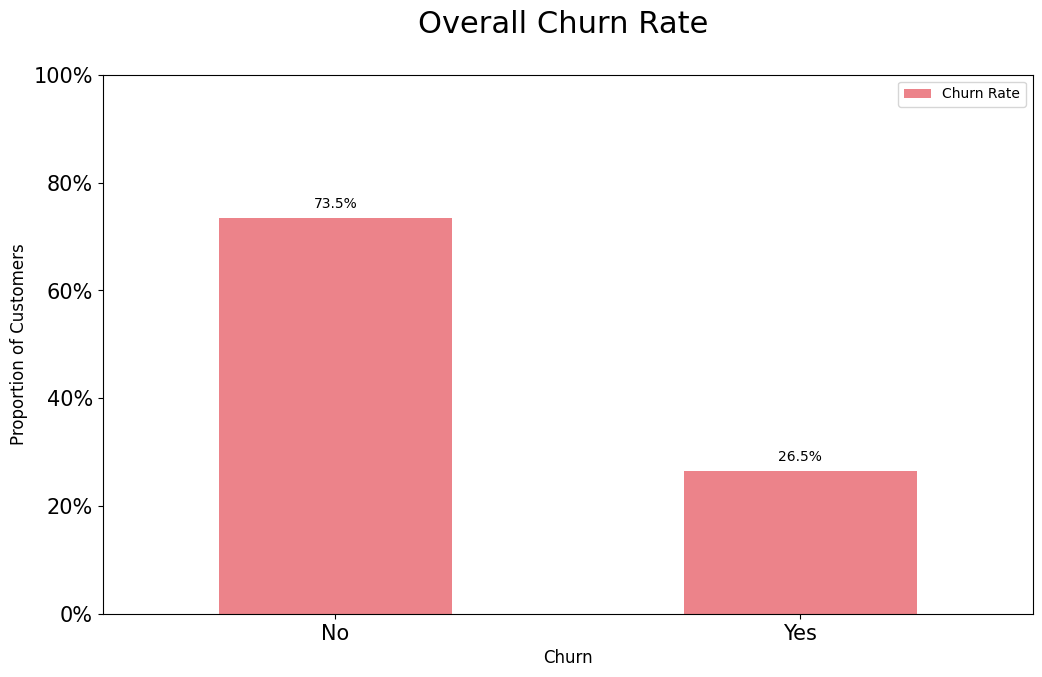

In [ ]:
# Analyze Churn Rate by Categorical variables:

#(1) Overall Churn Rate

import matplotlib.ticker as mtick
churn_rate = df_tmp[["Churn", "customerID"]]
churn_rate ["churn_label"] = pd.Series(np.where((churn_rate["Churn"] == 0), "No", "Yes"))
sectors = churn_rate .groupby ("churn_label")
churn_rate = pd.DataFrame(sectors["customerID"].count())
churn_rate ["Churn Rate"] = (churn_rate ["customerID"] / sum(churn_rate ["customerID"]) )*100
ax =  churn_rate[["Churn Rate"]].plot.bar(title = 'Overall Churn Rate', legend =True, table = False, grid = False,  subplots = False,  figsize =(12, 7), color = '#ec838a', fontsize = 15, stacked=False, ylim =(0,100))

plt.ylabel('Proportion of Customers',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Churn',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Overall Churn Rate \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
x_labels = np.array(churn_rate[["customerID"]])

def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'

        label = "{:.1f}%".format(y_value)
        ax.annotate(
            label,
            (x_value, y_value),
            xytext=(0, space),
            textcoords="offset points",
            ha='center',
            va=va)
add_value_labels(ax)
ax.autoscale(enable=False, axis='both', tight=False)

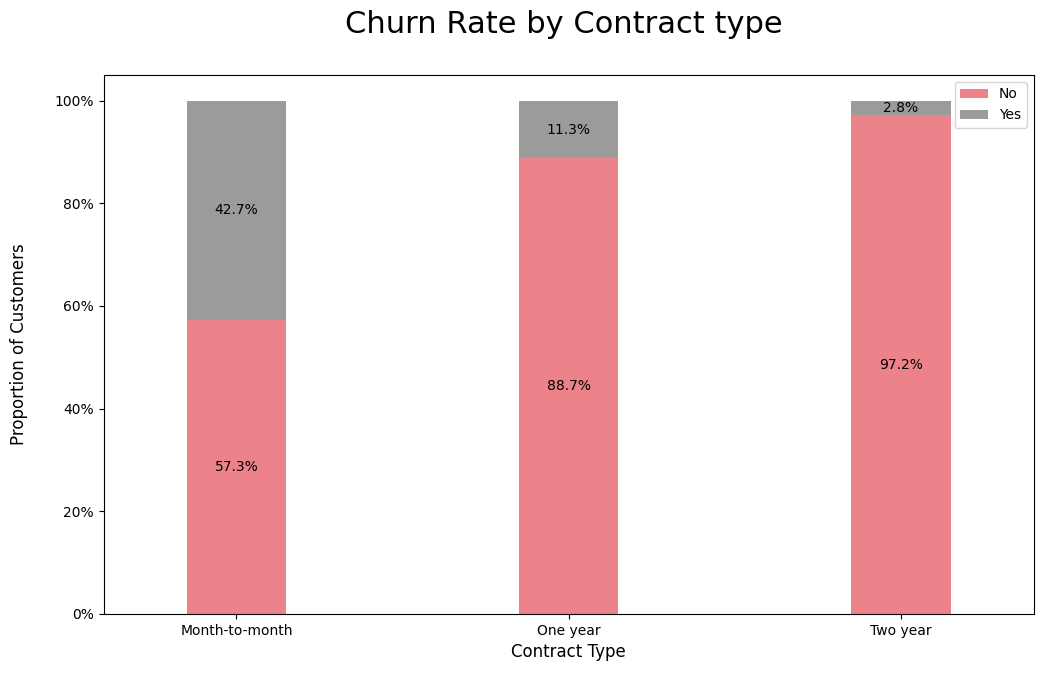

In [ ]:
import matplotlib.ticker as mtick

contract_churn = df.groupby(['Contract','Churn']).size().unstack()

contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['#ec838a','#9b9c9a']

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (12,7),
                                                                color = colors)





plt.ylabel('Proportion of Customers\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Contract Type\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Churn Rate by Contract type \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2,
            y+height/2,
            '{:.1f}%'.format(height),
            horizontalalignment='center',
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)

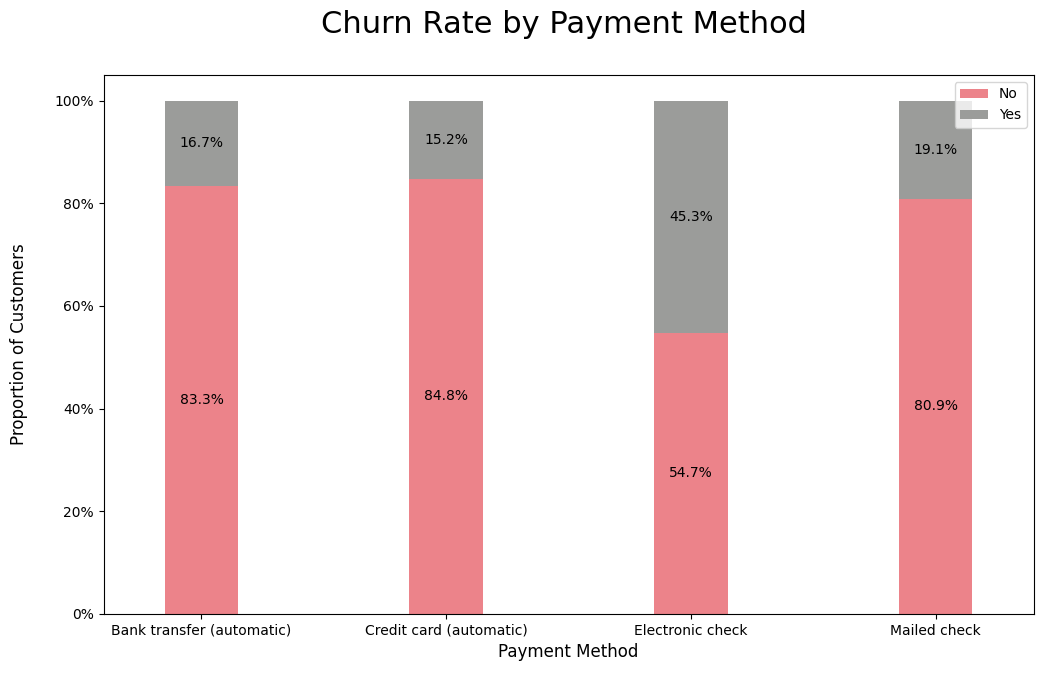

In [ ]:
import matplotlib.ticker as mtick

contract_churn = df.groupby(['PaymentMethod', 'Churn']).size().unstack()

contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['#ec838a','#9b9c9a', '#f3babc' , '#4d4f4c']

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (12,7),
                                                                color = colors)





plt.ylabel('Proportion of Customers\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Payment Method\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Churn Rate by Payment Method \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2,
            y+height/2,
            '{:.1f}%'.format(height),
            horizontalalignment='center',
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)

## One-Hot Encoding untuk kolom2 kategorikal sisanya

In [ ]:
#Incase if user_id is an object:
identity = df_tmp["customerID"]

df_tmp = df_tmp.drop(columns="customerID")

# convert rest of categorical variable into dummy
df_tmp= pd.get_dummies(df_tmp) # One-Hot Encoding

In [ ]:
df_tmp = pd.concat([df_tmp, identity], axis = 1)
df_tmp

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,customerID
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,True,False,False,False,False,True,False,7590-VHVEG
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,True,False,False,False,False,True,5575-GNVDE
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,True,False,False,False,False,False,True,3668-QPYBK
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,False,False,False,True,False,True,False,False,False,7795-CFOCW
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,True,False,False,False,False,True,False,9237-HQITU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.50,0,...,False,True,False,True,False,False,False,False,True,6840-RESVB
7039,0,0,1,1,72,1,1,103.20,7362.90,0,...,False,True,False,True,False,False,True,False,False,2234-XADUH
7040,0,0,1,1,11,0,1,29.60,346.45,0,...,False,False,True,False,False,False,False,True,False,4801-JZAZL
7041,1,1,1,0,4,1,1,74.40,306.60,1,...,False,False,True,False,False,False,False,False,True,8361-LTMKD


In [ ]:
one_hot_columns = df_tmp.columns # simpan kolom hasil one-hot encoding untuk dipakai nanti

## Split dataset

In [ ]:
# Split dataset into dependent and independent variables

#identify target variable:
target = df_tmp["Churn"]
df_tmp = df_tmp.drop(columns="Churn")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_tmp, target,
                                                    stratify=target, # supaya ratio value di data training dan test sama
                                                    test_size = 0.2, #use 0.1 if data is huge.
                                                    random_state = 0)

In [ ]:
print("Dimensi X_train dataset: ", X_train.shape)
print("Dimensi y_train dataset: ", y_train.shape)
print("Dimensi X_test dataset: ", X_test.shape)
print("Dimensi y_test dataset: ", y_test.shape)

Dimensi X_train dataset:  (5634, 41)
Dimensi y_train dataset:  (5634,)
Dimensi X_test dataset:  (1409, 41)
Dimensi y_test dataset:  (1409,)


In [ ]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,customerID
2499,1,0,0,1,41,1,0,70.20,2894.55,True,...,False,False,False,True,False,False,False,False,True,6061-GWWAV
5807,1,0,0,0,57,1,0,18.80,1094.35,True,...,True,False,False,False,True,False,True,False,False,8464-EETCQ
5118,0,0,1,0,42,1,1,85.90,3729.75,False,...,False,False,True,False,False,False,True,False,False,7621-VPNET
275,1,0,1,0,5,1,1,85.40,401.10,False,...,False,False,True,False,False,False,False,True,False,6432-TWQLB
1350,0,0,1,0,67,1,0,65.65,4322.85,False,...,False,False,False,False,True,False,False,False,True,4102-HLENU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712,0,0,0,0,29,1,1,55.25,1620.20,False,...,False,False,False,True,False,False,False,True,False,6303-KFWSL
1954,1,0,0,0,1,1,1,75.45,75.45,False,...,False,False,True,False,False,False,False,True,False,5834-ASPWA
525,1,0,0,0,52,1,0,91.25,4738.30,True,...,False,False,False,True,False,False,False,True,False,0750-EBAIU
5748,0,0,0,0,21,1,1,99.85,1992.55,False,...,False,True,True,False,False,False,True,False,False,4686-UXDML


In [ ]:
# Removing Identifiers

train_identity = X_train['customerID']
X_train = X_train.drop(columns = ['customerID'])

test_identity = X_test['customerID']
X_test = X_test.drop(columns = ['customerID'])

In [ ]:
# Feature Scaling

sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

In [ ]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2499,0.996103,-0.444067,-0.961343,1.545268,0.363266,0.327252,-1.203537,0.193982,0.285152,1.030277,...,1.237335,-0.529854,-0.792372,-1.116428,1.958584,-0.559447,-0.525181,-0.530678,-0.707107,1.825882
5807,0.996103,-0.444067,-0.961343,-0.647137,1.016103,0.327252,-1.203537,-1.515002,-0.512822,1.030277,...,-0.808189,1.887311,-0.792372,-1.116428,-0.510573,1.787480,-0.525181,1.884380,-0.707107,-0.547680
5118,-1.003913,-0.444067,1.040211,-0.647137,0.404069,0.327252,0.830884,0.715987,0.655370,-0.970613,...,1.237335,-0.529854,-0.792372,0.895714,-0.510573,-0.559447,-0.525181,1.884380,-0.707107,-0.547680
275,0.996103,-0.444067,1.040211,-0.647137,-1.105616,0.327252,0.830884,0.699362,-0.820119,-0.970613,...,1.237335,-0.529854,-0.792372,0.895714,-0.510573,-0.559447,-0.525181,-0.530678,1.414214,-0.547680
1350,-1.003913,-0.444067,1.040211,-0.647137,1.424126,0.327252,-1.203537,0.042700,0.918274,-0.970613,...,1.237335,-0.529854,-0.792372,-1.116428,-0.510573,1.787480,-0.525181,-0.530678,-0.707107,1.825882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712,-1.003913,-0.444067,-0.961343,-0.647137,-0.126361,0.327252,0.830884,-0.303086,-0.279729,-0.970613,...,1.237335,-0.529854,-0.792372,-1.116428,1.958584,-0.559447,-0.525181,-0.530678,1.414214,-0.547680
1954,0.996103,-0.444067,-0.961343,-0.647137,-1.268825,0.327252,0.830884,0.368538,-0.964469,-0.970613,...,1.237335,-0.529854,-0.792372,0.895714,-0.510573,-0.559447,-0.525181,-0.530678,1.414214,-0.547680
525,0.996103,-0.444067,-0.961343,-0.647137,0.812091,0.327252,-1.203537,0.893867,1.102430,1.030277,...,1.237335,-0.529854,-0.792372,-1.116428,1.958584,-0.559447,-0.525181,-0.530678,1.414214,-0.547680
5748,-1.003913,-0.444067,-0.961343,-0.647137,-0.452779,0.327252,0.830884,1.179806,-0.114677,-0.970613,...,-0.808189,-0.529854,1.262034,0.895714,-0.510573,-0.559447,-0.525181,1.884380,-0.707107,-0.547680


## Model Selection

In [ ]:
models = []

models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0,
                                                         class_weight='balanced')))

models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))

models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, criterion = 'entropy', random_state = 0)))

In [ ]:
#Evaluating Model Results:


acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD',
       'Accuracy Mean', 'Accuracy STD']

model_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using k-fold cross-validation
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1

model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,84.35,1.64,74.44,1.20
2,Random Forest,82.41,2.08,79.07,1.20
1,Decision Tree Classifier,66.30,1.96,73.45,1.59


In [ ]:
# Compare Baseline Classification Algorithms - Second Iteration
# Logistic Regression

# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#Evaluate results

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
roc_auc = roc_auc_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1, f2, roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'ROC-AUC'])

# Decision Tree


# Fitting Decision Tree to the Training set:

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


# Predicting the Test set results
y_pred = classifier.predict(X_test)

#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
roc_auc = roc_auc_score(y_test, y_pred)

model_results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1, f2, roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'ROC-AUC'])

results = pd.concat([results,model_results], ignore_index = True)


# Random Forest

# Fitting Random Forest to the Training set:

classifier = RandomForestClassifier(n_estimators = 72, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


# Predicting the Test set results
y_pred = classifier.predict(X_test)

#Evaluate results

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
roc_auc = roc_auc_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest', acc, prec, rec, f1, f2, roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'ROC-AUC'])

results = pd.concat([results,model_results], ignore_index = True)

In [ ]:
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)


print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score  \
0  Logistic Regression  0.800568   0.645768  0.550802  0.594517  0.567493   
2        Random Forest  0.787083   0.635036  0.465241  0.537037  0.491525   
1        Decision Tree  0.732434   0.496144  0.516043  0.505898  0.511936   

    ROC-AUC  
0  0.720812  
2  0.684311  
1  0.663335  


In [ ]:
# Train & evaluate Chosen Model


# Fit Logistic Regression on the Training dataset:

classifier = LogisticRegression(random_state = 0, penalty = 'l2')
classifier.fit(X_train, y_train)


# Predict the Test set results

y_pred = classifier.predict(X_test)

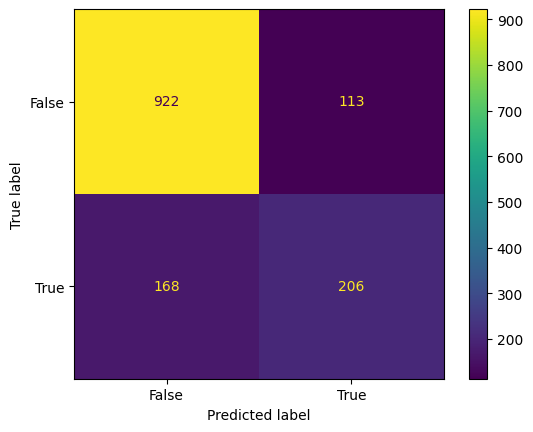

In [ ]:
cm = confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()

In [ ]:
#Evaluate Model Results on Test Set:

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
roc_auc = roc_auc_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1, f2, roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'ROC AUC '])

print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score  \
0  Logistic Regression  0.800568   0.645768  0.550802  0.594517  0.567493   

   ROC AUC   
0  0.720812  


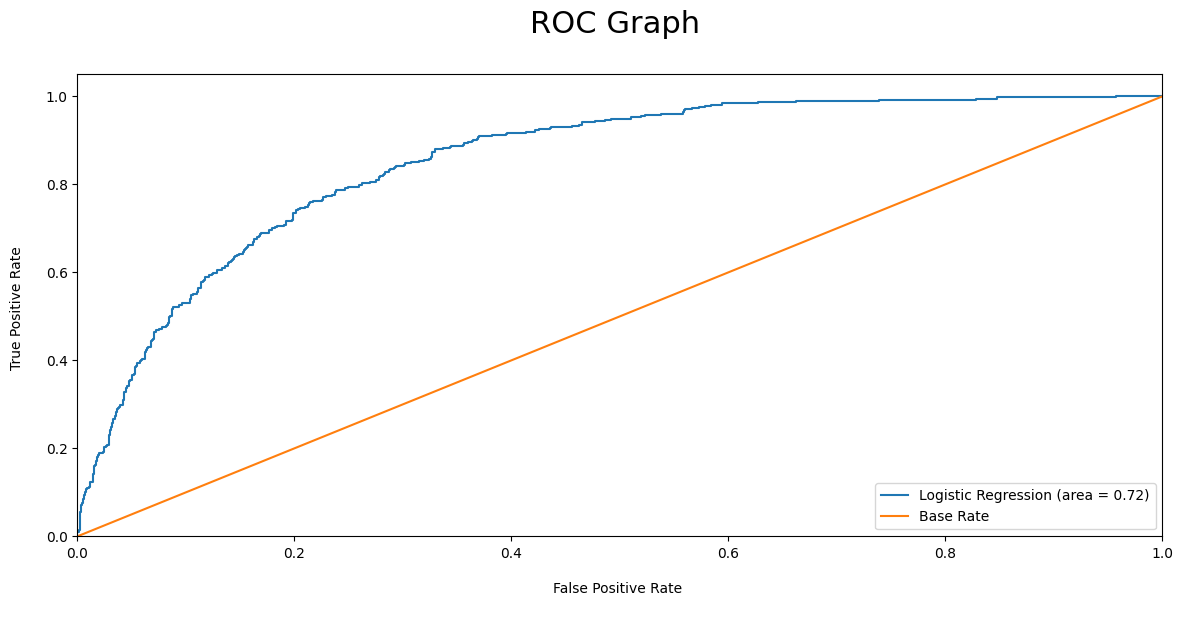

In [ ]:
# Evaluate the model using ROC Graph

classifier.fit(X_train, y_train)
probs = classifier.predict_proba(X_test)
probs = probs[:, 1]
classifier_roc_auc = roc_auc_score(y_test, y_pred )


rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC
plt.plot(rf_fpr, rf_tpr, label='Logistic Regression (area = %0.2f)' % classifier_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])



plt.ylabel('True Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")



plt.show()

## Coba Prediksi Data Baru

#### Dengan model Logistic Regression yang sudah kita dapatkan di atas, berikan contoh pengaplikasian model untuk memprediksi SATU BARIS data baru pelanggan. Diberikan nilai untuk setiap variabel originalnya, gunakan model untuk memprediksi apakah pelanggan tersebut bakal berhenti berlangganan atau tidak.

In [ ]:
# mencoba input data baru untuk diprediksi
data_baru = {'CustomerID': ['7389-B0USA'],
             'gender':['Female'],
             'SeniorCitizen':[1],
             'Partner':['Yes'],
             'Dependents':['Yes'],
             'tenure':[3],
             'PhoneService':['Yes'],
             'MultipleLines':['No'],
             'InternetService':['DSL'],
             'OnlineSecurity':['Yes'],
             'OnlineBackup':['No'],
             'DeviceProtection':['Yes'],
             'TechSupport':['Yes'],
             'StreamingTV':['Yes'],
             'StreamingMovies':['Yes'],
             'Contract':['Month-to-month'],
             'PaperlessBilling':['Yes'],
             'PaymentMethod':['Electronic check'],
             'MonthlyCharges':[25],
             'TotalCharges':[27]}

In [ ]:
data_baru = pd.DataFrame(data_baru)
data_baru

,CustomerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7389-B0USA,Female,1,Yes,Yes,3,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,25,27


In [ ]:
data_baru_tf = data_baru.copy()

In [ ]:
data_baru_tf = data_baru_tf.drop(columns='CustomerID')

In [ ]:
print(encoders.keys())

dict_keys(['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn'])


In [ ]:
encoders.pop('Churn', None)

for col, le in encoders.items():
    if col in data_baru_tf.columns:
        data_baru_tf[col] = le.transform(data_baru_tf[col])

In [ ]:
# one-hot encoding
data_baru_tf = pd.get_dummies(data_baru_tf)

# align columns
data_baru_tf = data_baru_tf.reindex(columns=X_train.columns, fill_value=0)

data_baru_tf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,1,1,3,1,1,25,27,True,...,0,0,True,True,0,0,0,0,True,0


In [ ]:
# lakukan scaling
data_baru_tf_scaled = sc_X.transform(data_baru_tf.loc[0].values.reshape(1,-1))
pd.DataFrame(data_baru_tf_scaled)

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-1.003913,2.251915,1.040211,1.545268,-1.18722,0.327252,0.830884,-1.30886,-0.985946,1.030277,...,-0.808189,-0.529854,1.262034,0.895714,-0.510573,-0.559447,-0.525181,-0.530678,1.414214,-0.54768


In [ ]:
y_pred = classifier.predict(data_baru_tf_scaled)
print(y_pred) # hasil prediksi untuk data baru

[1]


In [ ]:
data_baru['Churn'] = y_pred
data_baru['Churn'] = data_baru['Churn'].map({1: 'Yes', 0: 'No'})
pd.DataFrame(data_baru)

,CustomerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7389-B0USA,Female,1,Yes,Yes,3,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,25,27,Yes
